In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading and having a look into the data**






In [9]:
#Loading the datasets
customers = pd.read_csv('/content/sample_data/Customers.csv')
products = pd.read_csv('/content/sample_data/Products.csv')
transactions = pd.read_csv('/content/sample_data/Transactions.csv')

#Displaying first few rows
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [10]:
#Checking data types
print(customers.info())
print(products.info())
print(transactions.info())

#Checking for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [11]:
#Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


# **Exploratory Data Analysis (EDA)**

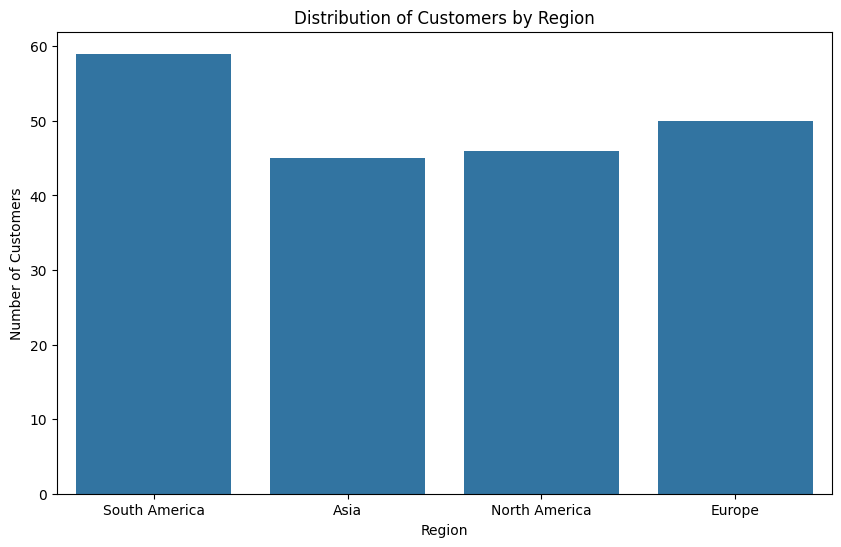

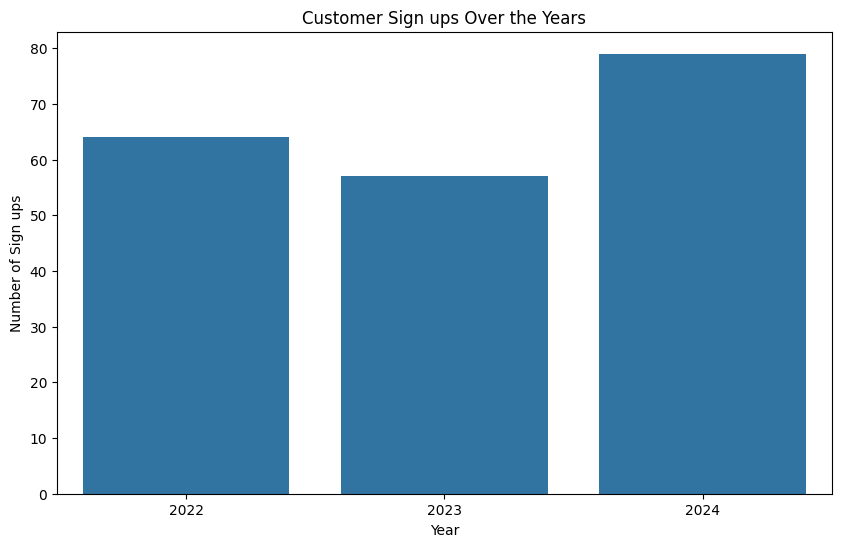

In [14]:
#Customer analysis by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

#Convert Signup date to date time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

#Trends in customer signup over time
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='SignupYear')
plt.title('Customer Sign ups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sign ups')
plt.show()

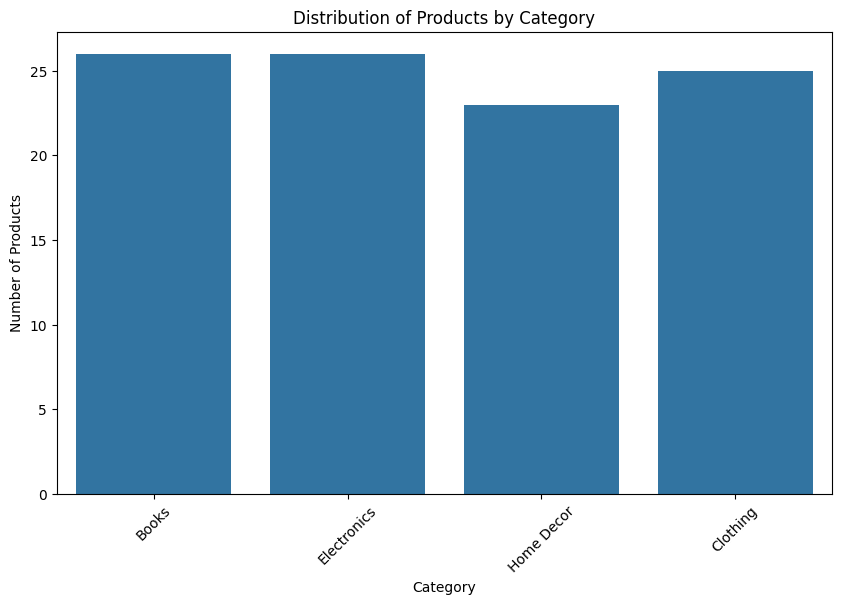

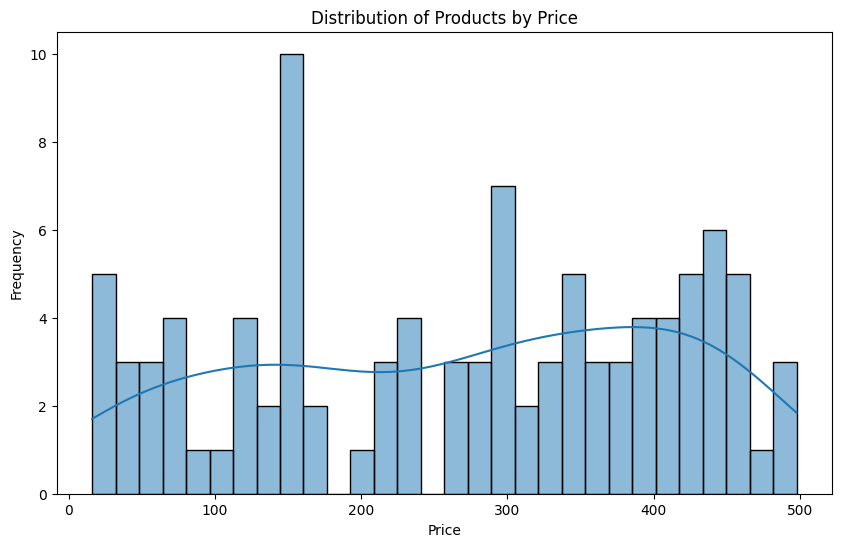

In [16]:
#Product analysis by category
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

#Product analysis by Price
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Products by Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

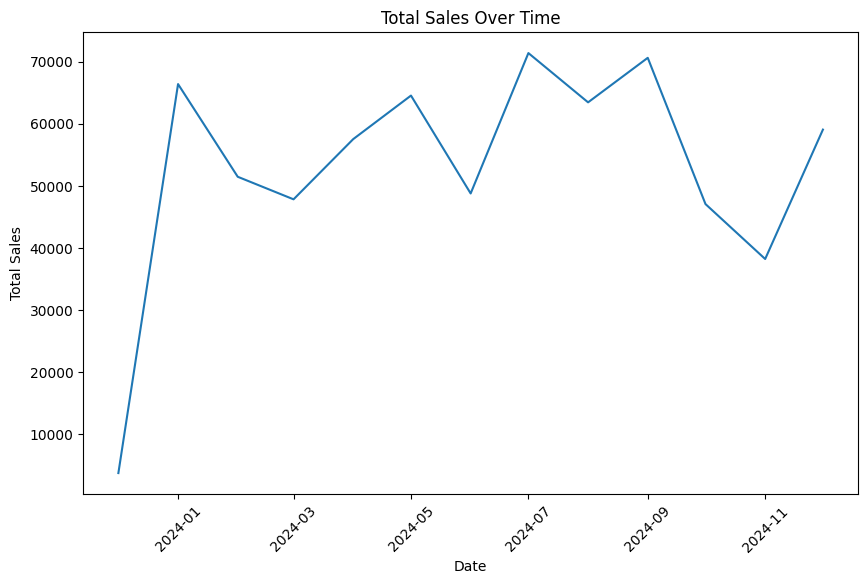

In [19]:
#Transaction Analysis

#Analyzing total sales over time
sales_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().reset_index()
sales_over_time['TransactionDate'] = sales_over_time['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['TransactionDate'], sales_over_time['TotalValue'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()